R2得分： 0.872439668518558
平均平方误差： 303.1541632820606


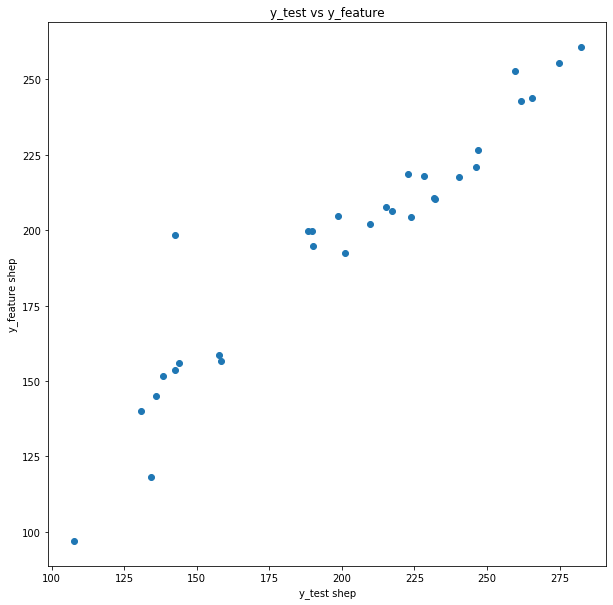

In [41]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import pickle
import pandas as pd
import numpy as np



#读取原始数据
pd_data = pd.read_csv('./btc-eth.csv')

np_array = np.array(pd_data)

x = np_array[:,:4]
y = np_array[:,4].reshape(-1,1)


#测试数据集切分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


#模型训练
clf = LinearRegression()
clf.fit(x_train, y_train)


# 模型预测
y_feature = clf.predict(x_test)

# 模型评分
print('R2得分：', sm.r2_score(y_test, y_feature))
print('平均平方误差：',sm.mean_squared_error(y_test, y_feature))
fig1= plt.figure(figsize=[10,10])
plt.scatter(y_test, y_feature)
plt.title('y_test vs y_feature')
plt.xlabel('y_test shep')
plt.ylabel('y_feature shep')
plt.show()


#保存模型
# 模型持久化
fw = open('./lr-eth.pkl', 'wb') 
pickle.dump(clf, fw)

R2得分： 0.8924794885592744
平均平方误差： 255.52842567059741


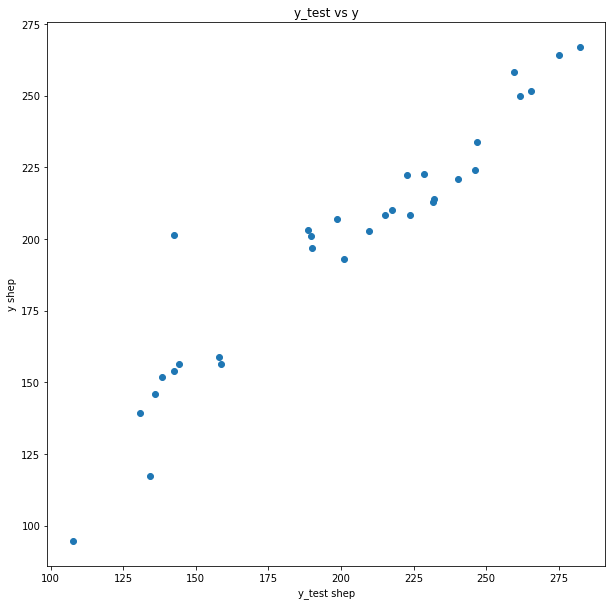

In [43]:
# 模型加载
fr = open('./lr-eth.pkl', 'rb') 
model = pickle.load(fr)

#模型评分
y = model.predict(x_test)


print('R2得分：', sm.r2_score(y_test, y))
print('平均平方误差：',sm.mean_squared_error(y_test, y))
fig2= plt.figure(figsize=[10,10])
plt.scatter(y_test, y)
plt.title('y_test vs y')
plt.xlabel('y_test shep')
plt.ylabel('y shep')
plt.show()